In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('laliga1718_goals.csv')

In [8]:
cols = df.columns
cols

Index(['Unnamed: 0', 'player', 'own_goal', 'minute', 'extra_minute',
       'fixture_id', 'team', 'opponent', 'updated_score', 'score_a', 'score_b',
       'tied', 'up_1', 'up_2', 'down_1', 'score_grade', 'time_weight',
       'player_clutch_score'],
      dtype='object')

In [16]:
df_table = df.drop(columns=['Unnamed: 0', 'fixture_id', 'opponent', 'updated_score',
                            'score_a', 'score_b', 'score_grade', 'time_weight'], axis=1)
df_table.own_goal.replace({0: False, 1: True}, inplace=True)
df_table.extra_minute.fillna(False, inplace=True)
df_table.head()

,player,own_goal,minute,extra_minute,team,tied,up_1,up_2,down_1,player_clutch_score
0,José Luis Morales,False,88,False,Levante,False,True,False,False,4.400000
1,Willian José,False,88,False,Real Sociedad,False,True,False,False,4.400000
2,Juanmi,False,80,False,Real Sociedad,True,False,False,False,3.150000
3,Maxi Gómez,False,50,False,Celta de Vigo,False,True,False,False,1.538462
4,Mikel Oyarzabal,False,33,False,Real Sociedad,True,False,False,False,0.440000


## La Liga Clutch Analysis - 2017/18 Season

### *Top 10 Scorers* - Are They Clutch?

In [43]:
# List - SEASON's Top 10 scoring players 
top10_scorers_lst = df_table.player.value_counts().head(10).index

# Dataframe - Top 10 scorers 
top10_scorers = df_table[df_table.player.isin(top10_scorers_lst)]

# List - TOTAL Goal Count - Top 10 scoring players
top10_goalcount = top10_scorers.player.value_counts()

# Dataframe - Top 10 scorers AFTER 80TH MINUTE
top10_scorers80 = df_table[df_table.minute > 80][df_table[df_table.minute > 80].player.isin(top10_scorers_lst)]

# List - Goal Count - AFTER 80TH MINUTE Top 10 scoring players
top10_goalcount80 = top10_scorers80.player.value_counts()

# List - Avg 'clutch_score' - AFTER 80TH MINUTE Top 10 scoring players
top10_avgclutch80 = top10_scorers80.groupby('player')['player_clutch_score'].agg(np.mean)

In [85]:
df_top10 = pd.concat([top10_avgclutch80, top10_goalcount80, top10_goalcount], axis=1, sort=False).reset_index()
df_top10.columns = ['player', 'c_score_after_80th', 'goals_after_80min', 'total_goals']
df_top10 = df_top10.sort_values(by='c_score_after_80th', ascending=False)
df_top10

,player,c_score_after_80th,goals_after_80min,total_goals
8,Maxi Gómez,3.690000,1,18
4,Gerard Moreno,3.005000,3,16
0,Antoine Griezmann,2.402500,2,19
2,Cristiano Ronaldo,2.387000,5,26
5,Iago Aspas,2.300000,2,24
6,Lionel Messi,1.954375,8,34
1,Cristhian Stuani,1.267500,2,19
7,Luis Suárez,1.058750,4,25
3,Gareth Bale,0.430000,1,16
9,Rodrigo Moreno,0.430000,1,16


### *Top Clutch Scorers* (4+ Goals after 80th minute)

In [71]:
## Dataframe - AFTER 80TH MINUTE Clutch scorers with +4 Goals
clutch_table = df_table[df_table.minute > 80].groupby('player').filter(lambda x: len(x) >= 4).sort_values(['player'])

# List - Player Names - AFTER 80TH MINUTE Clutch scorers with +4 Goals
players_clutch = clutch_after80.player.unique()

# List - TOTAL Goal Count - AFTER 80TH MINUTE Clutch scorers with +4 Goals
clutch_total_goalcnt = df_table[df_table.player.isin(players_clutch)].player.value_counts()

# List - Goal Count - AFTER 80TH MINUTE Clutch scorers with +4 Goals
clutch_goalcnt = clutch_after80.player.value_counts()

# List - Avg 'clutch_score' - AFTER 80TH MINUTE Clutch scorers with +4 Goals
clutch_avg_score = clutch_table.groupby('player')['player_clutch_score'].agg(np.mean)

In [163]:
clutch_table

,player,own_goal,minute,extra_minute,team,tied,up_1,up_2,down_1,player_clutch_score
874,Cristiano Ronaldo,False,87,False,Real Madrid,True,False,False,False,2.610
730,Cristiano Ronaldo,False,84,False,Real Madrid,False,True,False,False,4.200
196,Cristiano Ronaldo,False,85,False,Real Madrid,False,True,False,False,4.250
512,Cristiano Ronaldo,False,84,False,Real Madrid,False,False,False,False,0.420
774,Cristiano Ronaldo,False,90,1,Real Madrid,False,False,False,False,0.455
648,Daniel Parejo,False,85,False,Valencia,False,True,False,False,4.250
833,Daniel Parejo,False,87,False,Valencia,False,False,False,True,0.870
615,Daniel Parejo,False,89,False,Valencia,False,False,True,False,1.335
403,Daniel Parejo,False,81,False,Valencia,False,True,False,False,4.050
566,Lionel Messi,False,84,False,Barcelona,False,True,False,False,4.200


In [84]:
df_clutch = pd.concat([clutch_avg_score, clutch_goalcnt, clutch_total_goalcnt], axis=1, sort=False).reset_index()
df_clutch.columns = ['player', 'c_score_after_80th', 'goals_after_80th', 'total_goals']
df_clutch = df_clutch.sort_values(by='c_score_after_80th', ascending=False)
df_clutch

,player,c_score_after_80th,goals_after_80th,total_goals
1,Daniel Parejo,2.626250,4,7
0,Cristiano Ronaldo,2.387000,5,26
5,Ángel Rodríguez,2.131000,5,13
2,Lionel Messi,1.954375,8,34
4,Paulinho,1.623750,4,9
3,Luis Suárez,1.058750,4,25


In [88]:
df_clutch_sorted = df_clutch.sort_values(by='total_goals', ascending=False)
df_clutch_sorted

,player,c_score_after_80th,goals_after_80th,total_goals
2,Lionel Messi,1.954375,8,34
0,Cristiano Ronaldo,2.387000,5,26
3,Luis Suárez,1.058750,4,25
5,Ángel Rodríguez,2.131000,5,13
4,Paulinho,1.623750,4,9
1,Daniel Parejo,2.626250,4,7


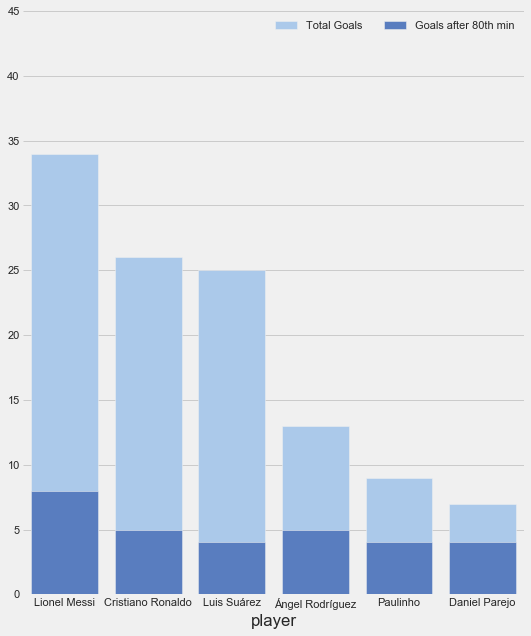

In [132]:
import matplotlib.style as style
style.use('fivethirtyeight')

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(8, 10))

# Plot total goals
sns.set_color_codes("pastel")
sns.barplot(x="player", y="total_goals", data=df_clutch_sorted,
            label="Total Goals", color="b")

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(x="player", y="goals_after_80th", data=df_clutch_sorted,
            label="Goals after 80th min", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="upper right", frameon=False)
ax.set(ylim=(0, 45), ylabel="")
sns.despine(left=True, bottom=True)

### *Top Clutch Teams* (15+ Goals after 80th minute)

In [153]:
## Dataframe - AFTER 80TH MINUTE Clutch Teams with +15 Goals
clutch_teams_table = df_table[df_table.minute > 80].groupby('team').filter(lambda x: len(x) >= 15).sort_values(['team'])

# List - Team Names - AFTER 80TH MINUTE Clutch Teams with +15 Goals
teams_clutch = clutch_teams_table.team.unique()

# List - TOTAL Goal Count - AFTER 80TH MINUTE Clutch Teams with +15 Goals
clutch_teams_total_goalcnt = df_table[df_table.team.isin(teams_clutch)].team.value_counts()

# List - Goal Count - AFTER 80TH MINUTE Clutch Teams with +15 Goals
clutch_teams_goalcnt = clutch_teams_table.team.value_counts()

# List - Avg 'clutch_score' - AFTER 80TH MINUTE Clutch Teams with +15 Goals
clutch_teams_avg_score = clutch_teams_table.groupby('team')['player_clutch_score'].agg(np.mean)

In [162]:
clutch_teams_table

,player,own_goal,minute,extra_minute,team,tied,up_1,up_2,down_1,player_clutch_score
523,Luis Suárez,False,89,False,Barcelona,False,False,False,False,0.445
566,Lionel Messi,False,84,False,Barcelona,False,True,False,False,4.200
586,Gerard Piqué,False,82,False,Barcelona,True,False,False,False,2.460
455,Paulinho,False,90,3,Barcelona,False,False,False,False,0.465
437,Aleix Vidal,False,90,3,Barcelona,False,False,False,False,0.465
646,Jordi Alba,False,88,False,Barcelona,False,False,True,False,1.320
400,Lionel Messi,False,83,False,Barcelona,False,False,True,False,1.245
793,Lionel Messi,False,89,False,Barcelona,True,False,False,False,2.670
349,Jordi Alba,False,82,False,Barcelona,True,False,False,False,2.460
305,Paulinho,False,90,False,Barcelona,False,False,False,False,0.450


In [157]:
df_teams_clutch = pd.concat([clutch_teams_avg_score, clutch_teams_goalcnt, clutch_teams_total_goalcnt], axis=1, sort=False).reset_index()
df_teams_clutch.columns = ['team', 'c_score_after_80th', 'goals_after_80th', 'total_goals']
df_teams_clutch = df_teams_clutch.sort_values(by='c_score_after_80th', ascending=False)
df_teams_clutch

,team,c_score_after_80th,goals_after_80th,total_goals
1,Real Betis,2.614667,15,59
0,Barcelona,1.495870,23,96
2,Real Madrid,1.360789,19,93


In [158]:
## Dataframe - EXTRA MINUTE Clutch Teams
xclutch_teams_table = df_table[df_table.extra_minute >= 1].groupby('team').filter(lambda x: len(x) >= 4).sort_values(['team'])

# List - Team Names - EXTRA MINUTE Clutch Teams
teams_xclutch = xclutch_teams_table.team.unique()

# List - TOTAL Goal Count - EXTRA MINUTE Clutch Teams
xclutch_teams_total_goalcnt = df_table[df_table.team.isin(teams_xclutch)].team.value_counts()

# List - Goal Count - EXTRA MINUTE Clutch Teams
xclutch_teams_goalcnt = xclutch_teams_table.team.value_counts()

# List - Avg 'clutch_score' - EXTRA MINUTE Clutch Teams
xclutch_teams_avg_score = xclutch_teams_table.groupby('team')['player_clutch_score'].agg(np.mean)

In [161]:
xclutch_teams_table

,player,own_goal,minute,extra_minute,team,tied,up_1,up_2,down_1,player_clutch_score
893,Ousmane Dembélé,False,90,3,Barcelona,False,False,False,False,0.465
275,Paulinho,False,90,2,Barcelona,False,False,True,False,1.380
437,Aleix Vidal,False,90,3,Barcelona,False,False,False,False,0.465
455,Paulinho,False,90,3,Barcelona,False,False,False,False,0.465
290,Enes Ünal,False,90,2,Levante,False,False,False,True,0.920
859,Emmanuel Boateng,False,90,3,Levante,False,True,False,False,4.650
824,José Campaña,False,90,2,Levante,False,True,False,False,4.600
538,Roger Martí,False,90,4,Levante,False,False,False,True,0.940
120,Antonio Sanabria,False,90,4,Real Betis,False,True,False,False,4.700
876,Júnior Firpo,False,90,4,Real Betis,False,True,False,False,4.700


In [159]:
df_teams_xclutch = pd.concat([xclutch_teams_avg_score, xclutch_teams_goalcnt, xclutch_teams_total_goalcnt], axis=1, sort=False).reset_index()
df_teams_xclutch.columns = ['team', 'c_score_extra_minute', 'goals_extra_minute', 'total_goals']
df_teams_xclutch = df_teams_xclutch.sort_values(by='c_score_extra_minute', ascending=False)
df_teams_xclutch

,team,c_score_extra_minute,goals_extra_minute,total_goals
1,Levante,2.777500,4,46
2,Real Betis,2.295714,7,59
4,Villarreal,1.464000,5,56
0,Barcelona,0.693750,4,96
3,Real Madrid,0.422500,4,93
